# Name: G. Loksai
# Register Number: 2028031
# Assignment: ETE (Web Scrapping and using that data for EDA)

In [1]:
#importing the required libraries.
import numpy as np
import pandas as pd
# this library request the website for getting the data and this function will run at the where GET function is applied.
import requests
# this library is used for the web scrapping.
from bs4 import BeautifulSoup
import time
from datetime import timedelta
# this is used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Below we are selecting 20 pages in the website
total_number_of_webpages = 20


start_time = time.time()
dataframe_final = pd.DataFrame()
# this below code runs the different pages and the classes we have given in the code, which gives the relevent data
# and stored in their respective empty list.
for page in range(1, total_number_of_webpages+1):
    print("scraping webpage number: {page} of {total}".format(page=page, total=total_number_of_webpages))
    loop_time = time.time()
    
    # set page url and header
    url = "https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&wid=18.productCard.PMU_V2_9&page={}".format(page)
       
    # get page response from the website
    response = requests.get(url)
    # time.sleep(0.1)
    
    # pass the page to BeautifulSoup
    soup = BeautifulSoup(response.text, 'lxml')
    
    # find all the company cards from the webpage
    company_cards = soup.find_all("div", class_="_2kHMtA")
    
    # extract all the required data from each company card and store them in a list
    Brand_name = []
    rating = []
    discounted_prices = []
    orginal_prices = []
    percentage_offer= []
    exchange_prices = []
    votes = []
    
    # scraping thr data from website
    for card in company_cards:
        # 1. Brand name has been taken for the product
        try:
            Brand_name.append(card.find("div", class_="_4rR01T").text.strip())
        except:
            Brand_name.append(None)

        # 2. rating of the product
        try:
            rating.append(card.find("div", class_="_3LWZlK").text.strip())
        except:
            rating.append(None)

        # 3. discounted price of the product
        try:
            discounted_prices.append(card.find("div", class_="_30jeq3 _1_WHN1").text.strip())
        except:
            discounted_prices.append(None)
            
        # 4. orginal price of the product
        try:
            orginal_prices.append(card.find("div", class_="_3I9_wc _27UcVY").text.strip())
        except:
            orginal_prices.append(None)
            
        #5. percentage_offer of the product   
        try:
            percentage_offer.append(card.find("div", class_="_3Ay6Sb").text.strip())
        except:
            percentage_offer.append(None)
            
                       
        # 6. exchange price of the product
        try:
            exchange_prices.append(card.find("div", class_="_3xFhiH").text.strip())
        except:
            exchange_prices.append(None)
                    
        # 7. Votes of the product
        try:
            votes.append(card.find("span", class_="_2_R_DZ").text.strip())
        except:
            votes.append(None)
                
    # make a dictionary containing all the data extracted from the website regarding the product.
    col_dic = {
        "BRAND_NAME": Brand_name,
        "Rating": rating,
        "Orginal Prices": orginal_prices,
        "Discounted Prices": discounted_prices,
        "Percentage_Offer": percentage_offer,
        "Exchange_price": exchange_prices,
        "Votes" : votes
            }
    
    # pass the dictionary to pandas to create a dataframe (page)
    df = pd.DataFrame(col_dic)
    
    # append the dataframe to the final dataframe (the whole website)
    dataframe_final = dataframe_final.append(df, ignore_index=True)
    
    # if the code runs without any error it shows success.
    print("success!")
    print("time taken:", round((time.time()-loop_time)*1000, 2), "ms")
    print("total time elapsed:", str(timedelta(seconds=(time.time()-start_time))))
    print()

end_time = time.time()
print("full website scraped successfully!")
print("total time taken:", str(timedelta(seconds=(end_time - start_time))))
print()


# Print some statistics about the final dataframe:
print("dataframe shape", dataframe_final.shape)
print()
print("column-wise null count")
print(dataframe_final.isna().sum())
print()

# export the data to external csv
dataframe_final.to_csv("C:\\Users\\LOKSAI\\List_of_Telivisions.csv", encoding="utf-8")

scraping webpage number: 1 of 20
success!
time taken: 1080.53 ms
total time elapsed: 0:00:01.090218

scraping webpage number: 2 of 20
success!
time taken: 1078.22 ms
total time elapsed: 0:00:02.168434

scraping webpage number: 3 of 20
success!
time taken: 1407.17 ms
total time elapsed: 0:00:03.584795

scraping webpage number: 4 of 20
success!
time taken: 1137.52 ms
total time elapsed: 0:00:04.722319

scraping webpage number: 5 of 20
success!
time taken: 1017.36 ms
total time elapsed: 0:00:05.739678

scraping webpage number: 6 of 20
success!
time taken: 1143.59 ms
total time elapsed: 0:00:06.883264

scraping webpage number: 7 of 20
success!
time taken: 1212.14 ms
total time elapsed: 0:00:08.095399

scraping webpage number: 8 of 20
success!
time taken: 1128.43 ms
total time elapsed: 0:00:09.240525

scraping webpage number: 9 of 20
success!
time taken: 948.38 ms
total time elapsed: 0:00:10.188906

scraping webpage number: 10 of 20
success!
time taken: 954.2 ms
total time elapsed: 0:00:11.

In [4]:
# this codes shows the shape of the web scrapping data.
dataframe_final.shape

(480, 7)

In [5]:
#checking null values
dataframe_final.isnull().sum()

BRAND_NAME            0
Rating               76
Orginal Prices       29
Discounted Prices     0
Percentage_Offer     34
Exchange_price       54
Votes                76
dtype: int64

In [6]:
# droping the null values because we cant take mean or median for the null values.
# As the null data have unique for every product so we cant replace those values other than dropping.
dataframe_final= dataframe_final.dropna()

In [7]:
dataframe_final.isnull().sum()

BRAND_NAME           0
Rating               0
Orginal Prices       0
Discounted Prices    0
Percentage_Offer     0
Exchange_price       0
Votes                0
dtype: int64

In [59]:
#Reading the data sheet from the data frame where we have stored.
import pandas as pd
df=pd.read_csv("List_of_Telivisions.csv")

In [60]:
df.shape

(279, 8)

In [61]:
df.isnull().sum()

s.no                 0
BRAND_NAME           0
Rating               0
Orginal Prices       0
Discounted Prices    0
Percentage_Offer     0
Exchange_price       0
Votes                0
dtype: int64

In [62]:
# checking the top 10 rows of our data.
df.head(10)

,s.no,BRAND_NAME,Rating,Orginal Prices,Discounted Prices,Percentage_Offer,Exchange_price,Votes
0,0,iFFALCON by TCL - 79.97 cm (32 inch) & HD Read...,4.2,"₹18,999","₹14,999",21% off,"Upto ₹11,000 Off on Exchange","25,008 Ratings & 3,580 Reviews"
1,1,SAMSUNG The Frame 2020 Series - 163 cm (65 inc...,4.6,"₹2,22,900","₹1,29,990",41% off,"No Cost EMI from ₹5,417/month","3,960 Ratings & 615 Reviews"
2,3,Mi 4A PRO - 80 cm (32 inch) & HD Ready LED Sma...,4.4,"₹19,999","₹16,999",15% off,Bank Offer,"6,29,297 Ratings & 64,776 Reviews"
3,4,LG - 80 cm (32 inch) & HD Ready LED Smart TV,4.4,"₹21,990","₹17,999",18% off,"No Cost EMI from ₹2,000/month","29,119 Ratings & 2,639 Reviews"
4,6,Mi 4X - 108 cm (43 inch) & Ultra HD (4K) LED S...,4.3,"₹34,999","₹29,999",14% off,Bank Offer,"68,412 Ratings & 7,312 Reviews"
5,7,Mi 4A Horizon Edition - 100 cm (40 inch) & Ful...,4.3,"₹29,999","₹24,999",16% off,Bank Offer,"8,679 Ratings & 815 Reviews"
6,8,Mi 4A Pro - 108 cm (43 inch) & Full HD LED Sma...,4.4,"₹29,999","₹26,999",10% off,"Upto ₹11,000 Off on Exchange","6,29,297 Ratings & 64,776 Reviews"
7,9,Mi 4X - 125.7 cm (50 inch) & Ultra HD (4K) LED...,4.3,"₹41,999","₹38,999",7% off,Bank Offer,"68,412 Ratings & 7,312 Reviews"
8,10,Mi 4A - 100 cm (40 inch) & Full HD LED Smart A...,4.4,"₹24,999","₹23,999",4% off,Bank Offer,"6,29,297 Ratings & 64,776 Reviews"
9,11,Vu Premium - 108 cm (43 inch) & Full HD LED Sm...,4.3,"₹40,000","₹26,999",32% off,"Upto ₹11,000 Off on Exchange","32,213 Ratings & 4,476 Reviews"


In [63]:
# the data preprocessing is occured in all below codes.
# here we are removing all the unused columns and syambols.
# the data splitting and replacing is also done in below codes.
df['Orginal Prices'] = df['Orginal Prices'].str.replace("₹",'')
df['Discounted Prices'] = df['Discounted Prices'].str.replace("₹",'')
df['Exchange_price'] = df['Exchange_price'].str.replace("No Cost EMI from",'')

df['votes'],df['review']= df['Votes'].str.split('&',1).str
df['votes'] = df['votes'].str.replace("Ratings",'')
df['review'] = df['review'].str.replace("Reviews",'')

df['Exchange_price'] = df['Exchange_price'].str.replace("Upto",'')
df['Exchange_price'] = df['Exchange_price'].str.replace(" Off on Exchange",'')
df['Exchange_price'] = df['Exchange_price'].str.replace("/month",'')
df['Exchange_price'] = df['Exchange_price'].str.replace("₹",'')

df['Orginal Prices'] = df['Orginal Prices'].str.replace(",",'')
df['Exchange_price'] = df['Exchange_price'].str.replace(",",'')
df['Discounted Prices'] = df['Discounted Prices'].str.replace(",",'')
df['votes'] = df['votes'].str.replace(",",'')
df['review'] = df['review'].str.replace(",",'')
df['Percentage_Offer'] = df['Percentage_Offer'].str.replace("%",'')

<ipython-input-63-a5a49d524275>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['votes'],df['review']= df['Votes'].str.split('&',1).str


In [64]:
df['Percentage_Offer'] = df['Percentage_Offer'].str.replace(" off",'')
df['Exchange_price'] = df['Exchange_price'].str.replace("Bank Offer",'0')

df['Brand_Name'],df['size']=df['BRAND_NAME'].str.split('-',1).str
df['size'],df['display']= df['size'].str.split('&',1).str

<ipython-input-64-0c440b1a8720>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Brand_Name'],df['size']=df['BRAND_NAME'].str.split('-',1).str
<ipython-input-64-0c440b1a8720>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['size'],df['display']= df['size'].str.split('&',1).str


In [65]:
# deleting the unwanted columns from the data frame.
del df['s.no']
del df['BRAND_NAME']
del df['Votes']

In [66]:
#checking the titles of all columns.
titles = list(df.columns)
titles

['Rating',
 'Orginal Prices',
 'Discounted Prices',
 'Percentage_Offer',
 'Exchange_price',
 'votes',
 'review',
 'Brand_Name',
 'size',
 'display']

In [67]:
# replacing all the columns as a required order in the dataframe.
titles[0],titles[1],titles[2],titles[3],titles[4],titles[5],titles[6],titles[7],titles[8],titles[9] = titles[7],titles[8],titles[9],titles[0],titles[1],titles[2],titles[3],titles[4],titles[5],titles[6] 

In [68]:
df = df[titles]

In [69]:
df

,Brand_Name,size,display,Rating,Orginal Prices,Discounted Prices,Percentage_Offer,Exchange_price,votes,review
0,iFFALCON by TCL,79.97 cm (32 inch),HD Ready LED Smart Android TV,4.2,18999,14999,21,11000,25008,3580
1,SAMSUNG The Frame 2020 Series,163 cm (65 inch),QLED Ultra HD (4K) Smart TV,4.6,222900,129990,41,5417,3960,615
2,Mi 4A PRO,80 cm (32 inch),HD Ready LED Smart Android TV,4.4,19999,16999,15,0,629297,64776
3,LG,80 cm (32 inch),HD Ready LED Smart TV,4.4,21990,17999,18,2000,29119,2639
4,Mi 4X,108 cm (43 inch),Ultra HD (4K) LED Smart Android TV,4.3,34999,29999,14,0,68412,7312
...,...,...,...,...,...,...,...,...,...,...
274,iFFALCON by TCL,79.97 cm (32 inch),HD Ready LED Smart Android TV,4.2,18999,14999,21,11000,25008,3580
275,SAMSUNG The Frame 2020 Series,163 cm (65 inch),QLED Ultra HD (4K) Smart TV,4.6,222900,129990,41,5417,3960,615
276,TCL,138.7 cm (55 inch),Ultra HD (4K) LED Smart Android TV,4.3,89900,55499,38,11000,106,28
277,Panasonic,108 cm (43 inch),Full HD LED Smart TV,4.4,59900,53999,9,11000,11,5


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Name         279 non-null    object 
 1   size               279 non-null    object 
 2   display            279 non-null    object 
 3   Rating             279 non-null    float64
 4   Orginal Prices     279 non-null    object 
 5   Discounted Prices  279 non-null    object 
 6   Percentage_Offer   279 non-null    object 
 7   Exchange_price     279 non-null    object 
 8   votes              279 non-null    object 
 9   review             279 non-null    object 
dtypes: float64(1), object(9)
memory usage: 21.9+ KB


In [27]:
# checking and replacing the data type ina correct data type.
df['Orginal Prices'] = df['Orginal Prices'].astype('int64')
df['Discounted Prices'] = df['Discounted Prices'].astype('int64')
df['Exchange_price'] = df['Exchange_price'].astype('int64')
df['Percentage_Offer'] = df['Percentage_Offer'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['review'] = df['review'].astype('int64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Name         279 non-null    object 
 1   size               279 non-null    object 
 2   display            279 non-null    object 
 3   Rating             279 non-null    float64
 4   Orginal Prices     279 non-null    int64  
 5   Discounted Prices  279 non-null    int64  
 6   Percentage_Offer   279 non-null    int64  
 7   Exchange_price     279 non-null    int64  
 8   votes              279 non-null    int64  
 9   review             279 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 21.9+ KB


In [29]:
df.describe()

,Rating,Orginal Prices,Discounted Prices,Percentage_Offer,Exchange_price,votes,review
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,4.341219,80902.043011,52894.293907,26.229391,6818.028674,17531.677419,2156.039427
std,0.267119,82500.957352,49225.649257,15.050911,4327.211731,66277.433010,6909.107595
min,2.300000,8490.000000,5499.000000,1.000000,0.000000,3.000000,0.000000
25%,4.300000,27999.000000,21499.000000,15.000000,2500.000000,211.000000,31.000000
50%,4.300000,47990.000000,34999.000000,23.000000,6834.000000,3482.000000,387.000000
75%,4.400000,97400.000000,60244.500000,39.000000,11000.000000,18745.000000,3446.500000
max,5.000000,499900.000000,341900.000000,65.000000,14445.000000,629297.000000,64776.000000


In [30]:
# checking the correlation for numerical variables
df.corr()

,Rating,Orginal Prices,Discounted Prices,Percentage_Offer,Exchange_price,votes,review
Rating,1.000000,0.162221,0.104194,0.162000,-0.199280,0.001559,0.000707
Orginal Prices,0.162221,1.000000,0.965640,0.513823,0.171457,-0.156994,-0.175375
Discounted Prices,0.104194,0.965640,1.000000,0.343584,0.120191,-0.145769,-0.162719
Percentage_Offer,0.162000,0.513823,0.343584,1.000000,0.379228,-0.212753,-0.224015
Exchange_price,-0.199280,0.171457,0.120191,0.379228,1.000000,-0.096787,-0.071861
votes,0.001559,-0.156994,-0.145769,-0.212753,-0.096787,1.000000,0.993551
review,0.000707,-0.175375,-0.162719,-0.224015,-0.071861,0.993551,1.000000


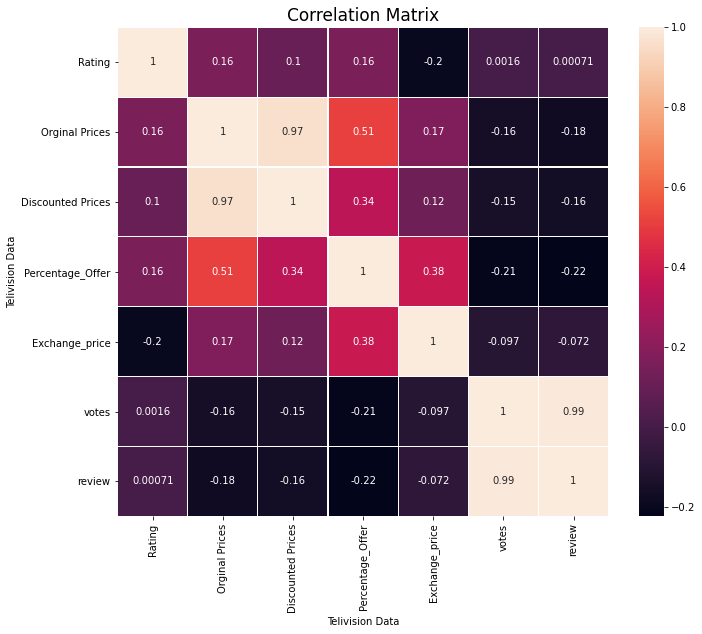

In [31]:
# Visualisation of the corralation table only for the numerical variables.
correlation = df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix', size=17)
plt.xlabel('Telivision Data')
plt.ylabel('Telivision Data')
plt.show()

In [32]:
# from the graph we can say that there are is a strong correlations within the numeric data the rating and review is having
#the high correlation of 0.99.
#I will change the other columns into numeric data to include them into the correlation.
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Brand_Name,size,display,Rating,Orginal Prices,Discounted Prices,Percentage_Offer,Exchange_price,votes,review
Brand_Name,1.000000,0.557031,0.298737,0.305191,0.639047,0.600672,0.533331,0.365847,0.757777,0.689136
size,0.557031,1.000000,0.341909,0.300905,0.583362,0.601713,0.588965,0.258650,0.561285,0.505012
display,0.298737,0.341909,1.000000,0.208429,0.435477,0.473754,0.423036,0.213746,0.392927,0.332840
Rating,0.305191,0.300905,0.208429,1.000000,0.342606,0.409858,0.364605,0.249789,0.306935,0.226871
Orginal Prices,0.639047,0.583362,0.435477,0.342606,1.000000,0.767349,0.639889,0.369524,0.788159,0.690261
Discounted Prices,0.600672,0.601713,0.473754,0.409858,0.767349,1.000000,0.648407,0.444420,0.746990,0.649279
Percentage_Offer,0.533331,0.588965,0.423036,0.364605,0.639889,0.648407,1.000000,0.256159,0.682693,0.644613
Exchange_price,0.365847,0.258650,0.213746,0.249789,0.369524,0.444420,0.256159,1.000000,0.316973,0.330052
votes,0.757777,0.561285,0.392927,0.306935,0.788159,0.746990,0.682693,0.316973,1.000000,0.885783
review,0.689136,0.505012,0.332840,0.226871,0.690261,0.649279,0.644613,0.330052,0.885783,1.000000


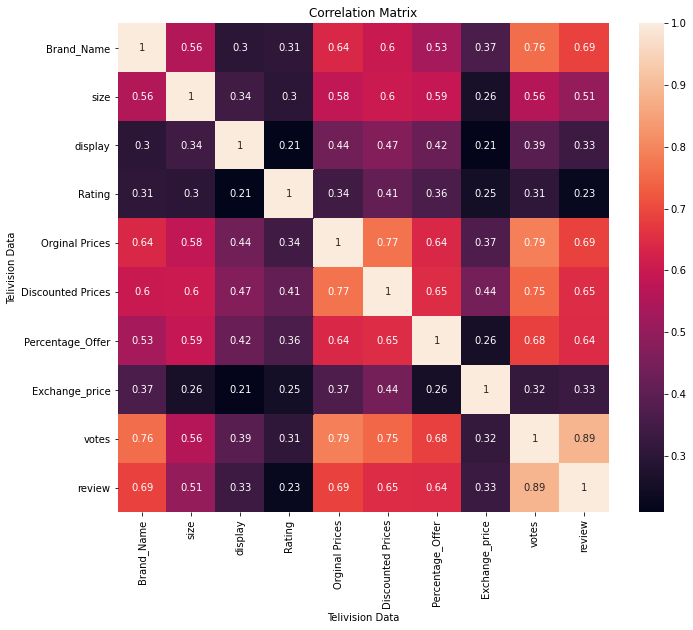

In [33]:
# # checking the correlation for all the variables
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix")
plt.xlabel("Telivision Data")
plt.ylabel("Telivision Data")
plt.show()

In [34]:
#now let us check which variables are having highest correlation and also highest correlations in descending order.
correlation_mat = correlation_matrix
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False).where(corr_pairs < 1.0)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.1]
print(strong_pairs)

votes           review               0.885783
review          votes                0.885783
votes           Orginal Prices       0.788159
Orginal Prices  votes                0.788159
                Discounted Prices    0.767349
                                       ...   
Rating          review               0.226871
Exchange_price  display              0.213746
display         Exchange_price       0.213746
Rating          display              0.208429
display         Rating               0.208429
Length: 90, dtype: float64


In [35]:
import numpy as np
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Orginal Prices', ylabel='Count'>

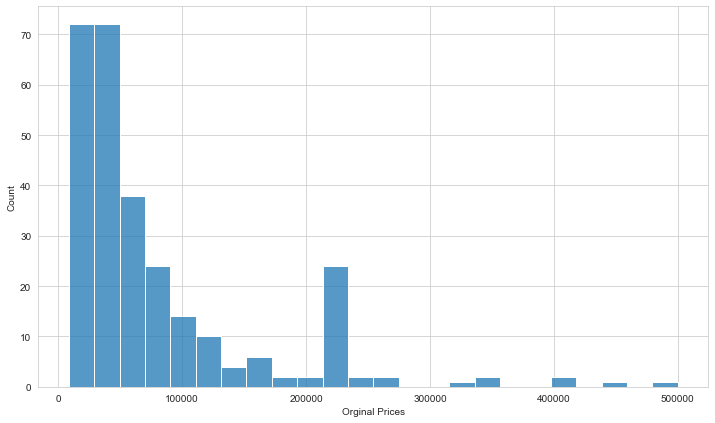

In [38]:
# Ploting histograme plot for original price
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.histplot(data = df, x = 'Orginal Prices')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

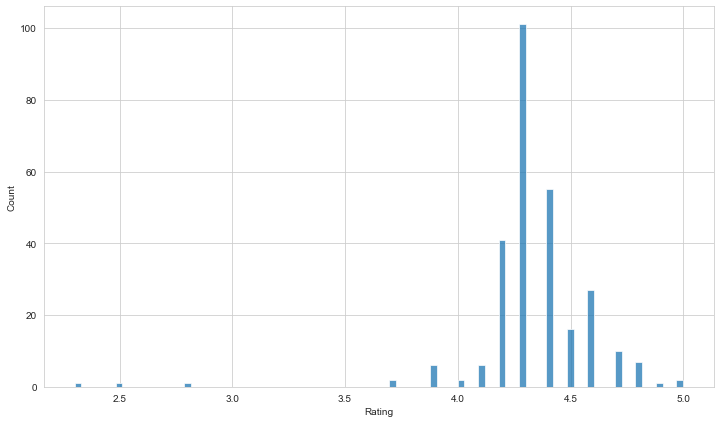

In [39]:
# Ploting histograme plot for rating
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.histplot(data = df, x = 'Rating')

<AxesSubplot:xlabel='votes', ylabel='Count'>

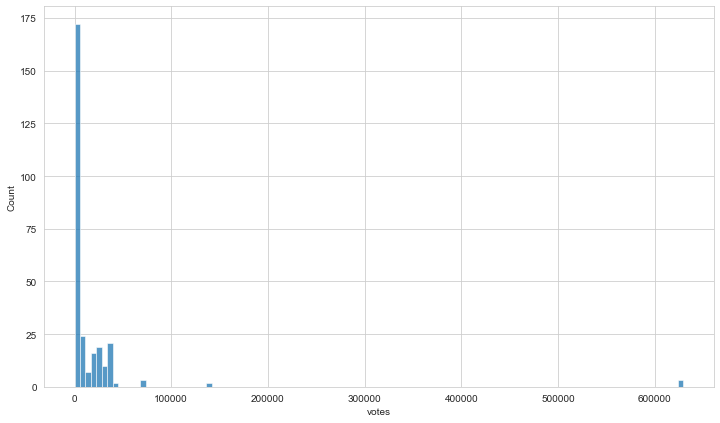

In [40]:
# Ploting histograme plot for votes
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.histplot(data = df, x = 'votes')

<AxesSubplot:xlabel='Rating', ylabel='Brand_Name'>

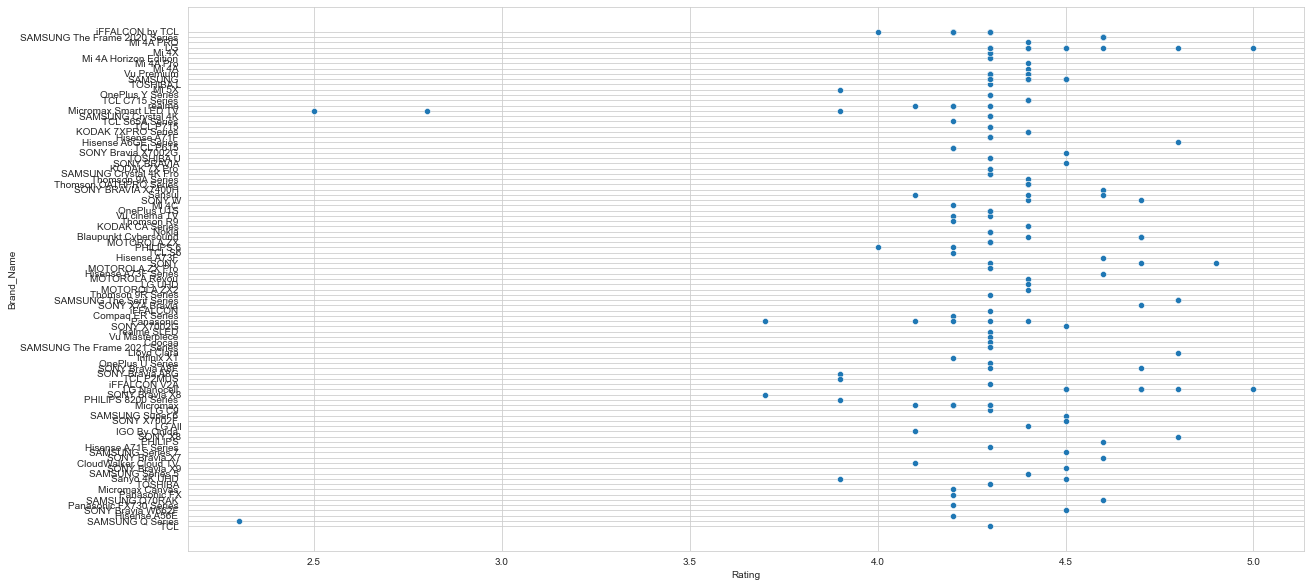

In [41]:
# Ploting scatter plot between rating and brand
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x = 'Rating', y= 'Brand_Name')

<AxesSubplot:xlabel='Rating', ylabel='votes'>

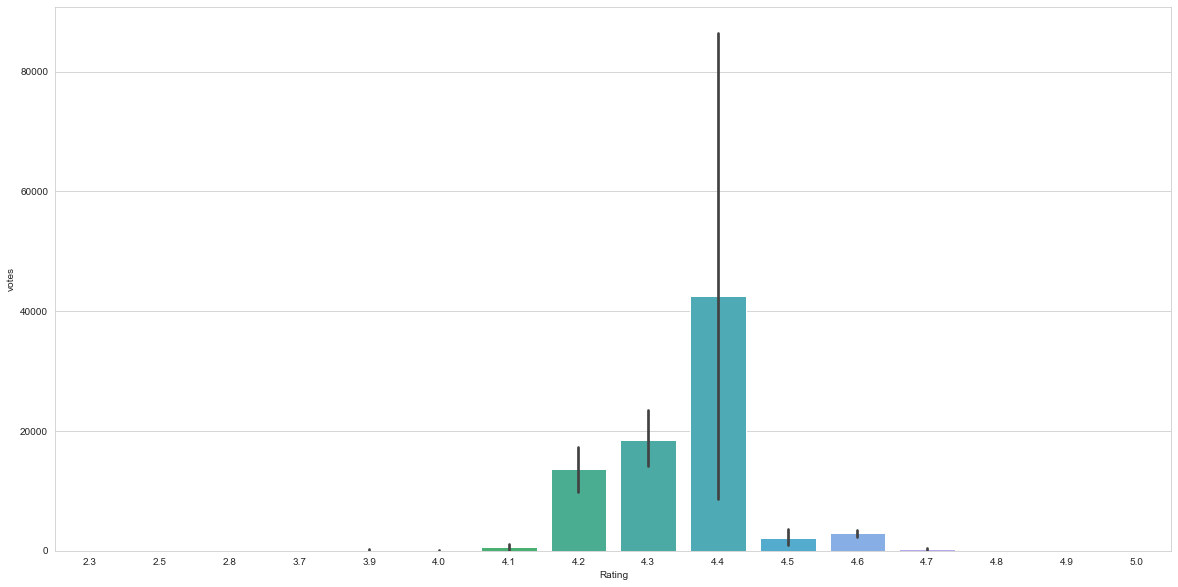

In [42]:
# Ploting bar plot for rating and votes
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'Rating', y= 'votes')

<AxesSubplot:xlabel='size', ylabel='Discounted Prices'>

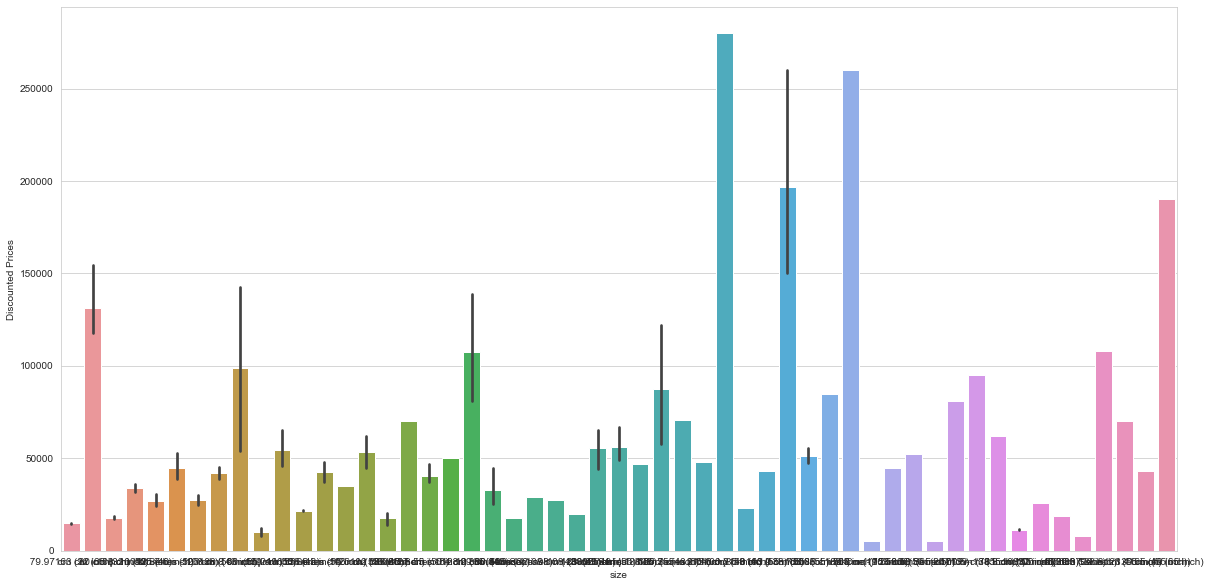

In [43]:
# Ploting bar plot for size and discounted price
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'size', y= 'Discounted Prices')

<AxesSubplot:xlabel='display', ylabel='Discounted Prices'>

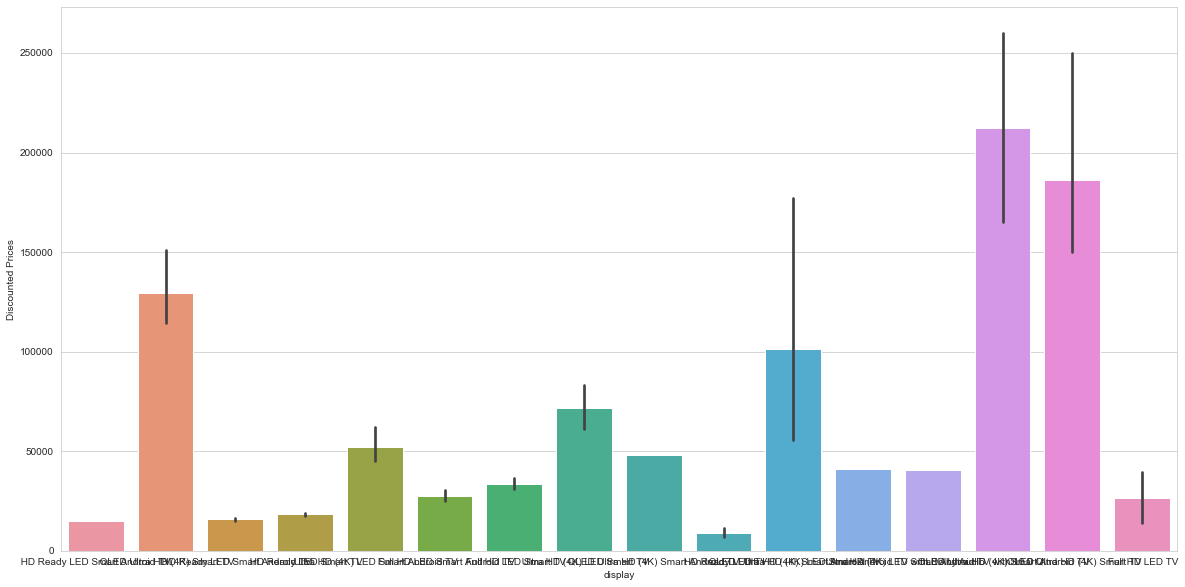

In [44]:
# Ploting bar plot display and discounted prices
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'display', y= 'Discounted Prices')

<AxesSubplot:xlabel='Percentage_Offer', ylabel='Exchange_price'>

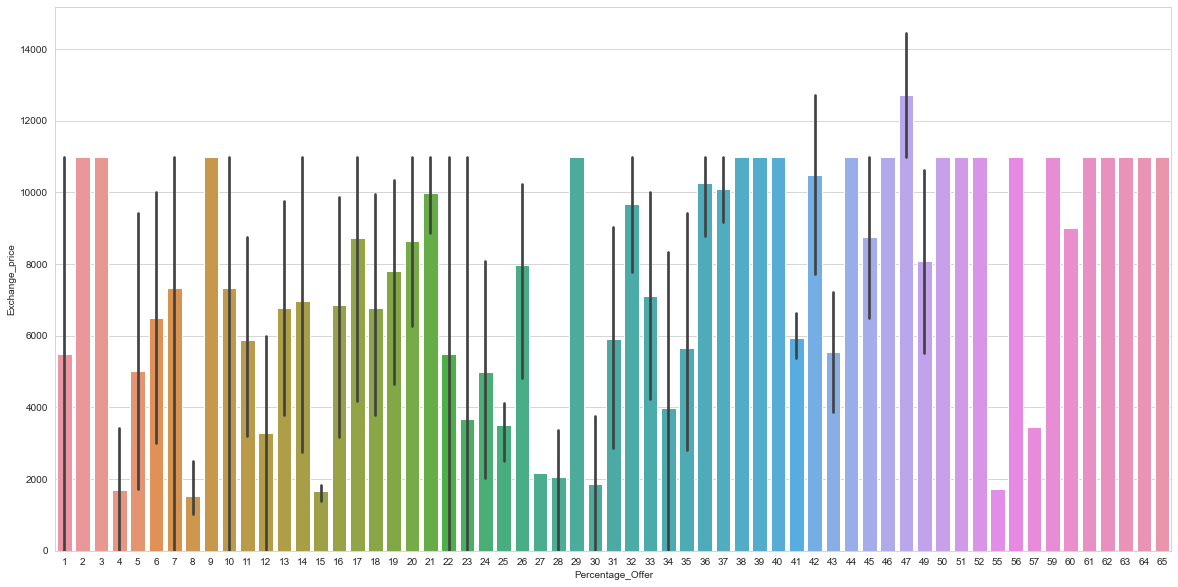

In [45]:
# Ploting barplot for percentage offer and exchange price
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'Percentage_Offer', y= 'Exchange_price')

#Bar plot between rating vs discounted price 

Text(0.5, 1.0, 'Rating vs Discounted Prices')

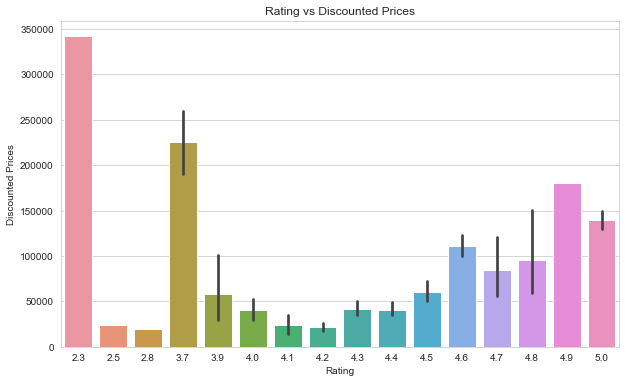

In [46]:
# plotting the bar grap between rating and discounted price
plt.figure(figsize=(10,6))
sns.barplot(x=df['Rating'],y=df['Discounted Prices'])
plt.title("Rating vs Discounted Prices")

Text(0.5, 1.0, 'Box Plot')

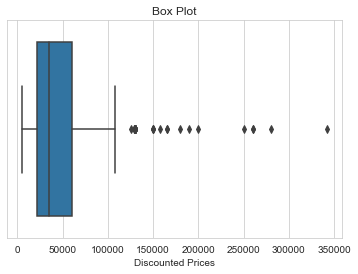

In [47]:
#from the below output we can see that some of the telivisions are having highest prices.
#From the below visualization, my analysis is that product available within 2.5,2.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5 ratings 
#with Price constraint 20,000 to 60,000.
sns.boxplot(x=df['Discounted Prices'])
plt.title("Box Plot")

# Conclusion

# Here in this web scrapping we collected the data from the flipkart website and made required number of derived columns which was difficult to gather all that data and there is more preprocessing work on the web scrapping data.
# The product i have choosen is televisions in flipkart and with the data collected I have performed some EDA on the data using  Bar plot, histogram and scatter plot.

# I have performed the Boxplot to identify which price range is more suitable for the purchasing and I got many outliers which are above 100,000 rupees by this we can say that the televisions whose price ranges between 20,000-60,000 are the best for  purchasing.
